# Natural Lenguage Procesing

---
## Importamos las librerias

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import seaborn as sns
import spacy as sp
import seaborn as sns
from nltk import FreqDist
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.collocations import *
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup
from nltk.stem import SnowballStemmer
from PIL import Image
from sklearn.feature_extraction.text import (CountVectorizer, 
                                             TfidfVectorizer,
                                             TfidfTransformer)
import requests
wordnet_lemmatizer = WordNetLemmatizer()

---

### Importamos el dataset

In [2]:
dataset = pd.read_json('dataset_es_dev.json', lines= True)
dataset.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


---


### Analizamos el Dataset

In [3]:
dataset=pd.concat([dataset],axis=1)
dataset.dropna(axis=0,inplace=True)

In [4]:
stopwords = nltk.corpus.stopwords.words('spanish')

In [5]:
dataset.describe()

,stars
count,5000.000000
mean,3.000000
std,1.414355
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


---

### Aplicamos Tokanización a la review

In [6]:
dataset['rb_tk'] = dataset['review_body'].apply(word_tokenize)

In [7]:
dataset.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,rb_tk
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless,"[Malisimo, ,, muy, grande, demasiado, aparatos..."
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel,"[No, he, recibido, el, pedido, no, la, devoluc..."
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports,"[Tengo, que, buscar, otro, sistema, ,, este, n..."
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement,"[Utilicé, las, brocas, de, menor, diámetro, y,..."
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty,"[No, me, gusta, su, olor, a, viejo, y, aspecto..."


---

### Aplicamos tokanización al Título

In [8]:
dataset['rt_tk'] = dataset['review_title'].apply(word_tokenize)

In [9]:
dataset.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,rb_tk,rt_tk
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless,"[Malisimo, ,, muy, grande, demasiado, aparatos...","[Mala, compra]"
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel,"[No, he, recibido, el, pedido, no, la, devoluc...","[No, lo, he, recibido]"
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports,"[Tengo, que, buscar, otro, sistema, ,, este, n...","[Que, no, aprieta, bien, en, el, manillar]"
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement,"[Utilicé, las, brocas, de, menor, diámetro, y,...","[Brocas, de, mantequilla]"
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty,"[No, me, gusta, su, olor, a, viejo, y, aspecto...","[No, me, gusta]"


___

### Lemantizamos el titulo y el texto

In [10]:
filtrar = []
if True:
    filtrar.append("u")
    filtrar.append("new")

In [11]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [12]:
titular_list=[]
for titular in dataset.rb_tk:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    titular=re.sub("[^a-zA-Z]"," ",str(titular))
    # Pasamos todo a minúsculas
    titular=titular.lower()
    # Tokenizamos para separar las palabras
    titular=nltk.word_tokenize(titular)
    
    # Aplicamos el Lemmatizer (Esto puede tardar un ratito)
    titular = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in titular]
    
    
    # Eliminamos las palabras d emenos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacamos las Stopwords
    titular = [palabra for palabra in titular if not palabra in stopwords]
    
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    #dataset["titular_normalizado"] = titular_list
    titular_list.append(titular)

In [13]:
# spanish_stemmer.stem("texto_en_str")
# spanish_stemmer.stem(w)

In [14]:
dataset["Body_leem"] = titular_list
dataset.tail()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,rb_tk,rt_tk,Body_leem
4995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home,"[Me, ha, encantado, la, cesta, ., Ha, llegado,...",[guadalupe],encantado cesta llegado impecable tama util pe...
4996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera,"[Desempeña, su, función, correctamente]","[calidad, precio]",desempe funci correctamente
4997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy,"[Me, ha, encantado, la, diadema, !, Las, flore...",[Excelente],encantado diadema flores vienen imagen aplasta...
4998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless,"[A, mi, me, gustan, mucho, las, fundas, TPU, ,...",[Genial],gustan fundas fundas normalmente finas colorid...
4999,es_0810087,product_es_0684221,reviewer_es_0613091,5,El artículo ha cumplido con las expectativas q...,Buena calidad,es,apparel,"[El, artículo, ha, cumplido, con, las, expecta...","[Buena, calidad]",culo cumplido expectativas deseaba


#### Frequencia de palabras lemantizadas

In [15]:
dataset['rb_lem_tk'] = dataset['Body_leem'].apply(word_tokenize)

In [16]:
B_Lemm_freq = dataset['rb_lem_tk']

In [17]:
rb_list_tk = list(itertools.chain(*B_Lemm_freq))

In [18]:
freq_bt = nltk.FreqDist(rb_list_tk)
freq_bt

FreqDist({'bien': 1328, 'calidad': 788, 'producto': 605, 'precio': 583, 'buena': 461, 'peque': 332, 'bastante': 324, 'funciona': 282, 'buen': 279, 'recomiendo': 245, ...})

In [19]:
df_bt = pd.DataFrame(list(freq_bt.items()), columns = ["Word","Frequency"])
df_bt.head()

,Word,Frequency
0,malisimo,6
1,grande,146
2,demasiado,149
3,aparatoso,5
4,protector,53


In [20]:
df_bt.sort_values('Frequency',ascending=False, inplace = True)
df_bt.head()

,Word,Frequency
12,bien,1328
79,calidad,788
85,producto,605
81,precio,583
509,buena,461


#### Lemantizamos los titulares

In [21]:
titular_list=[]
for titular in dataset.rt_tk:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    titular=re.sub("[^a-zA-Z]"," ",str(titular))
    # Pasamos todo a minúsculas
    titular=titular.lower()
    # Tokenizamos para separar las palabras
    titular=nltk.word_tokenize(titular)
    
    # Aplicamos el Lemmatizer (Esto puede tardar un ratito)
    titular = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in titular]
    
    
    # Eliminamos las palabras d emenos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacamos las Stopwords
    titular = [palabra for palabra in titular if not palabra in stopwords]
    
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    #dataset["titular_normalizado"] = titular_list
    titular_list.append(titular)

In [22]:
dataset["Titulo_lemm"] = titular_list
dataset.tail()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,rb_tk,rt_tk,Body_leem,rb_lem_tk,Titulo_lemm
4995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home,"[Me, ha, encantado, la, cesta, ., Ha, llegado,...",[guadalupe],encantado cesta llegado impecable tama util pe...,"[encantado, cesta, llegado, impecable, tama, u...",guadalupe
4996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera,"[Desempeña, su, función, correctamente]","[calidad, precio]",desempe funci correctamente,"[desempe, funci, correctamente]",calidad precio
4997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy,"[Me, ha, encantado, la, diadema, !, Las, flore...",[Excelente],encantado diadema flores vienen imagen aplasta...,"[encantado, diadema, flores, vienen, imagen, a...",excelente
4998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless,"[A, mi, me, gustan, mucho, las, fundas, TPU, ,...",[Genial],gustan fundas fundas normalmente finas colorid...,"[gustan, fundas, fundas, normalmente, finas, c...",genial
4999,es_0810087,product_es_0684221,reviewer_es_0613091,5,El artículo ha cumplido con las expectativas q...,Buena calidad,es,apparel,"[El, artículo, ha, cumplido, con, las, expecta...","[Buena, calidad]",culo cumplido expectativas deseaba,"[culo, cumplido, expectativas, deseaba]",buena calidad


#### Analizamos la frecuencia de las palabras en los titulos

In [23]:
dataset['rt_lem_tk'] = dataset['Titulo_lemm'].apply(word_tokenize)

In [24]:
T_Lemm_freq = dataset['rt_lem_tk']

In [25]:
rt_list_tk = list(itertools.chain(*T_Lemm_freq))

In [26]:
freq_tt = nltk.FreqDist(rt_list_tk)
freq_tt

FreqDist({'calidad': 401, 'bien': 309, 'buena': 237, 'precio': 230, 'producto': 190, 'buen': 190, 'mala': 104, 'perfecto': 102, 'bueno': 85, 'compra': 83, ...})

In [27]:
df_tt = pd.DataFrame(list(freq_bt.items()), columns = ["Word","Frequency"])
df_tt.head()

,Word,Frequency
0,malisimo,6
1,grande,146
2,demasiado,149
3,aparatoso,5
4,protector,53


In [28]:
df_tt.sort_values('Frequency',ascending=False, inplace = True)
df_tt.head()

,Word,Frequency
12,bien,1328
79,calidad,788
85,producto,605
81,precio,583
509,buena,461


---

### Vectorizamos las reviews

In [29]:
list_titulos = list(dataset['Body_leem'].values)
list_stars = dataset['stars'].values

In [30]:
 max_features=100
 tfidf_vec=TfidfVectorizer(max_features=max_features) # stop_words="english" , ngram_range=(1, 2)

In [31]:
vectorizer = CountVectorizer(analyzer='word', 
                              token_pattern=r'\b[a-zA-Z]{3,}\b',  
                              ngram_range=(1, 1) 
                              )  


In [32]:
# count_vectorized = vectorizer.fit_transform(list_titulos)
# tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
# matriz_titulos = tfidf_transformer.fit_transform(count_vectorized)
# all_words = vectorizer.get_feature_names()
# print("50 palabras mas usadas: ",all_words[0:50])

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1000

# Es decir que cada instancia tendrá 1000 features
cou_vec=CountVectorizer(max_features=max_features)  

In [34]:
matriz_titulos = vectorizer.fit_transform(list_titulos)
all_words = vectorizer.get_feature_names()
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['abajo', 'abarca', 'abeja', 'abertura', 'aberturas', 'abierta', 'abiertas', 'abierto', 'abiertos', 'abir', 'abismal', 'abollada', 'abollado', 'abona', 'abonar', 'abonaron', 'abono', 'abra', 'abran', 'abraza', 'abrazadera', 'abrazarla', 'abrazos', 'abre', 'abren', 'abres', 'abri', 'abriendo', 'abriga', 'abrigado', 'abrigan', 'abrigar', 'abrigo', 'abrigos', 'abril', 'abrillantar', 'abrir', 'abrirla', 'abrirle', 'abrirlo', 'abro', 'abrochar', 'absoluta', 'absolutamente', 'absoluto', 'absorbe', 'absorben', 'absorci', 'absurdo', 'abulta']


In [35]:
stars = dataset['stars']

In [36]:
x = matriz_titulos.toarray()
y = stars
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [37]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [38]:
# Create a based model
rfr = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfr, param_grid = random_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

---

### Hacemos un Random Forest Regresor

In [39]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [40]:
y_test_pred = regressor.predict(xtest)

In [41]:
y_train_pred = regressor.predict(xtrain)

#### Analizamos el MNSE

In [42]:
# print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))

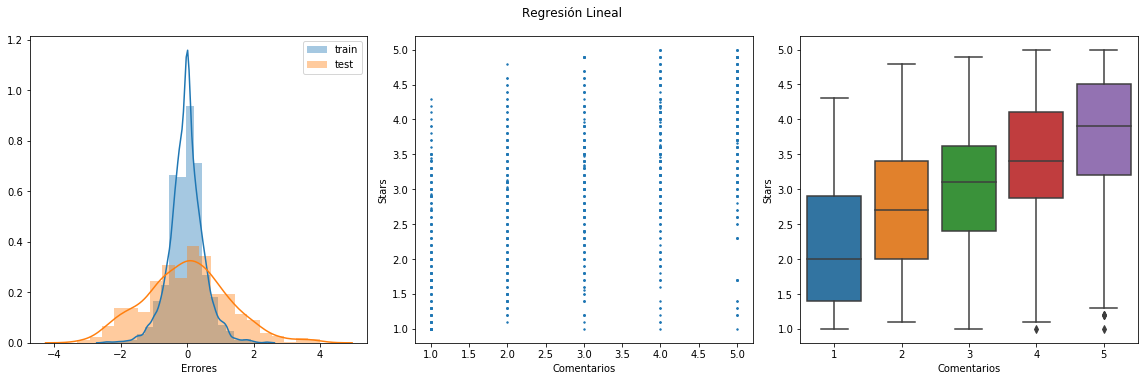

In [43]:
plt.figure(figsize = (16,5))
plt.suptitle("Regresión Lineal", y=1.05)

plt.subplot(1,3,1)
sns.distplot(ytrain - y_train_pred, bins = 20, label = 'train')
sns.distplot(ytest - y_test_pred, bins = 20, label = 'test')

plt.xlabel('Errores')
plt.legend()


ax = plt.subplot(1,3,2)
ax.scatter(ytest,y_test_pred, s =2)

plt.xlabel('Comentarios')
plt.ylabel('Stars')


ax = plt.subplot(1,3,3)
boxplot = sns.boxplot(ytest,y_test_pred,)
    
plt.xlabel('Comentarios')
plt.ylabel('Stars')
    
plt.tight_layout()
plt.show()

---

In [44]:
def confusion(ytest,y_pred):
    names=["Positivo","Negativo"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()


#### Analizamos el Accuracy

In [45]:
nb = GaussianNB()
nb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtest,ytest))

acc :  0.318


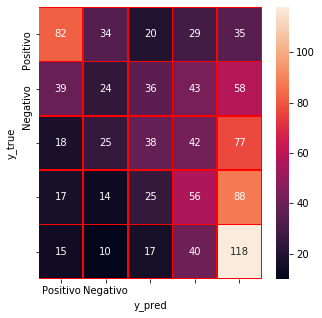

In [46]:
y_pred=nb.predict(xtest)
confusion(ytest,y_pred)

---

In [47]:
rfc = RandomForestClassifier()

### Hacemos un Random Forest Classifier

In [48]:
rfc = RandomForestClassifier(n_estimators = 10, random_state=42)
rfc.fit(xtrain,ytrain)
print("acc: ",rfc.score(xtest,ytest))

acc:  0.339


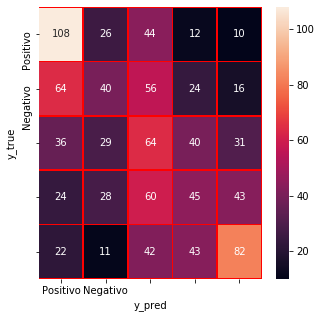

In [49]:
y_pred=rfc.predict(xtest)
confusion(ytest,y_pred)

### Graficamos la cantidad de palabras mas usadas


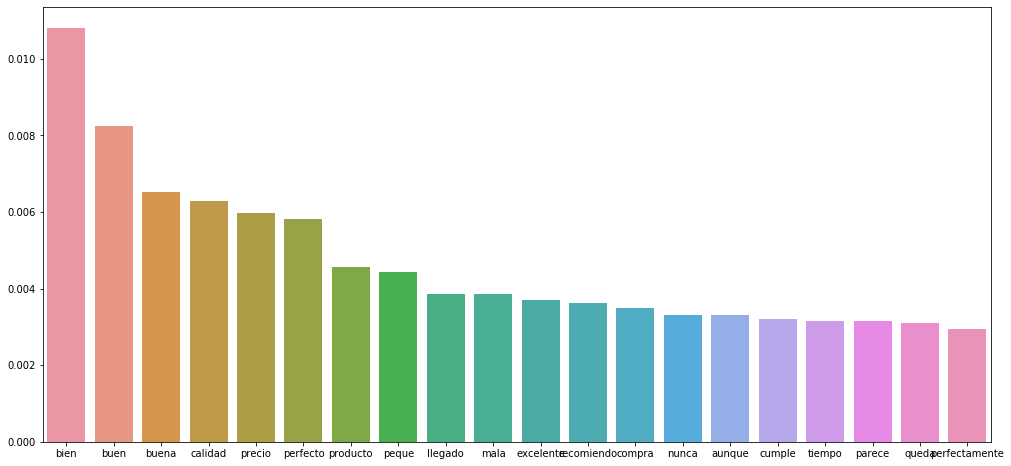

In [50]:
# Le preguntamos la importancia de cada feature (cada palabra)
importances = rfc.feature_importances_
# Tomamos la lista de palabras
# all_words = cou_vec.get_feature_names()
columns = all_words

# Ordenamos por importnacia y tomamos las 20 primeras
indices = np.argsort(importances)[::-1]
indices = indices[:20]
selected_columns = [columns[i] for i in indices]
selected_importances = importances[indices]

# Por ultimo graficamos
plt.figure(figsize = (17,8))
sns.barplot(selected_columns, selected_importances)
plt.show()

---

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1000

# Es decir que cada instancia tendrá 1000 features
cou_vec=CountVectorizer(max_features=max_features) # stop_words="english" , ngram_range=(1, 2)

In [52]:
svc = LinearSVC(C = 1)
svc.fit(xtrain,ytrain)
svc.score(xtest,ytest)

0.377

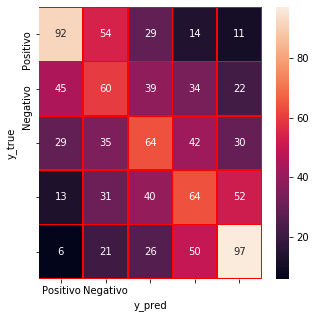

In [53]:
y_pred_svc=svc.predict(xtest)
confusion(ytest,y_pred_svc)

---

### Hacemos un CloudWord

In [54]:
comment_words = '' 
stopwords = set(STOPWORDS)

In [55]:
for val in dataset.rb_lem_tk: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

In [56]:

pic = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png',stream=True).raw))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, mask = pic, 
                min_font_size = 10).generate(comment_words)
                

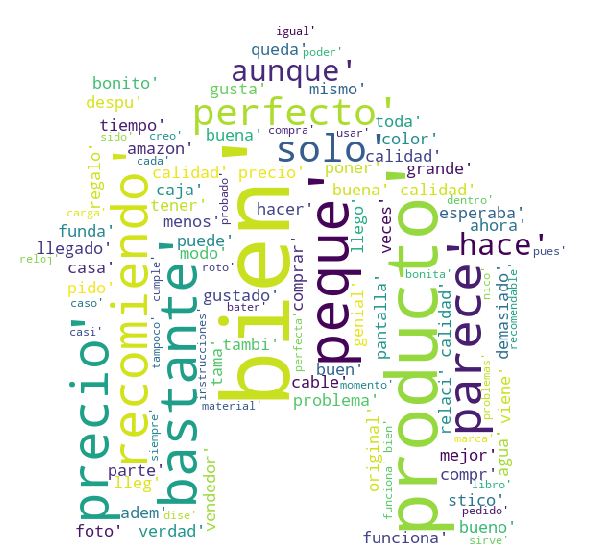

In [57]:
plt.figure(figsize = (8, 8), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

---

In [58]:
## 

In [59]:
# Imports de Keras
from keras.datasets import mnist,fashion_mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils, plot_model
from keras.regularizers import l1
# let's keep our keras backend tensorflow quiet
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import tensorflow as tf


---

In [60]:
x2 = dataset["Body_leem"]
y2 = dataset['stars']

In [61]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x2,y2,test_size=0.2,random_state=42,stratify=y)

---

## Deep Neural Network

In [62]:

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
 
vectorizer = CountVectorizer(binary=True, stop_words=stopwords.words('spanish'), 
                             lowercase=True, min_df=3, max_df=0.9, max_features=5000)
X_train_onehot =  tfidf_vec.fit_transform(xtrain2)
# X_train_onehot = tf.one_hot(ytrain2, depth=10)

## Redes Convucionales

In [63]:
vectorizer = CountVectorizer(binary=True, stop_words=stopwords.words('spanish'), 
                             lowercase=True, min_df=3, max_df=0.9, max_features=5000)
X_train_onehot = vectorizer.fit_transform(xtrain2)

In [64]:

word2idx = {word: idx for idx, word in enumerate(vectorizer.get_feature_names())}
tokenize = vectorizer.build_tokenizer()
preprocess = vectorizer.build_preprocessor()
 
def to_sequence(tokenizer, preprocessor, index, text):
    words = tokenizer(preprocessor(text))
    indexes = [index[word] for word in words if word in index]
    return indexes
 
print(to_sequence(tokenize, preprocess, word2idx, "This is an important test!"))  # [2269, 4453]
X_train_sequences = [to_sequence(tokenize, preprocess, word2idx, x) for x in xtrain2]
print(X_train_sequences[0])
 

[]
[2388, 2348, 428, 28, 1821, 1816]


In [65]:
# Compute the max lenght of a text
MAX_SEQ_LENGHT = len(max(X_train_sequences, key=len))
print("MAX_SEQ_LENGHT=", MAX_SEQ_LENGHT)
 
from keras.preprocessing.sequence import pad_sequences
N_FEATURES = len(vectorizer.get_feature_names())
X_train_sequences = pad_sequences(X_train_sequences, maxlen=MAX_SEQ_LENGHT, value=N_FEATURES)
print(X_train_sequences[0])

MAX_SEQ_LENGHT= 90
[2638 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638
 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638
 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638
 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638
 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638
 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638 2638
 2388 2348  428   28 1821 1816]


In [66]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Embedding
 
model = Sequential()
model.add(Embedding(len(vectorizer.get_feature_names()) + 1,
                    64,  # Embedding size
                    input_length=MAX_SEQ_LENGHT))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 90, 64)            168896    
_________________________________________________________________
conv1d (Conv1D)              (None, 86, 64)            20544     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 17, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1088)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                69696     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 259,201
Trainable params: 259,201
Non-trainable params: 0
__________________________________________________

In [67]:
history = model.fit(X_train_sequences[:-100], ytrain2[:-100], 
          epochs=3, batch_size=512, verbose=1,
          validation_data=(X_train_sequences[-100:], ytrain2[-100:]))

Epoch 1/3
8/8 [==============================] - 2s 165ms/step - loss: -0.0546 - accuracy: 0.1990 - val_loss: -4.5422 - val_accuracy: 0.1400
Epoch 2/3
8/8 [==============================] - 1s 69ms/step - loss: -7.5154 - accuracy: 0.2017 - val_loss: -24.7227 - val_accuracy: 0.1400
Epoch 3/3
8/8 [==============================] - 1s 67ms/step - loss: -33.6197 - accuracy: 0.1983 - val_loss: -84.3229 - val_accuracy: 0.1400


In [68]:
X_test_sequences = [to_sequence(tokenize, preprocess, word2idx, x) for x in xtest2]
X_test_sequences = pad_sequences(X_test_sequences, maxlen=MAX_SEQ_LENGHT, value=N_FEATURES)

In [69]:
scores = model.evaluate(X_test_sequences, ytest2, verbose=1)
print("Accuracy:", scores[1]) # 0.8766

32/32 [==============================] - 0s 2ms/step - loss: -79.9535 - accuracy: 0.2000
Accuracy: 0.20000000298023224


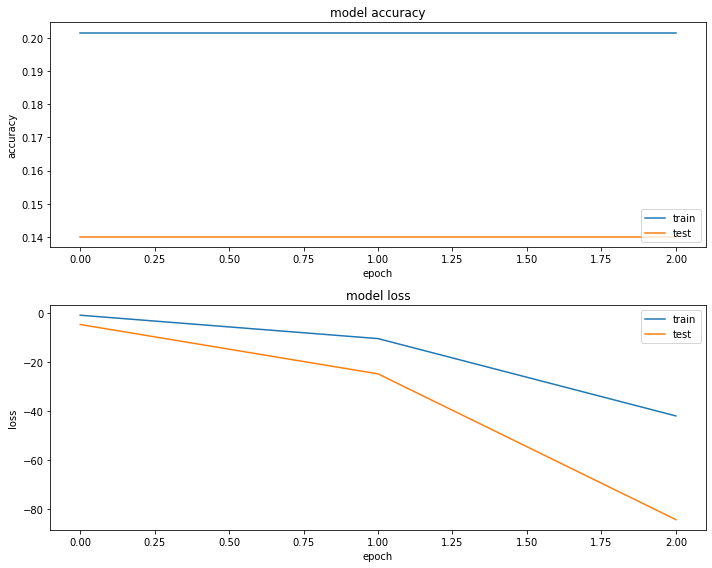

In [70]:
# plotting the metrics
fig = plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

---

## Red LSTM (Long Short Term Memory)

In [71]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
 
model = Sequential()
model.add(Embedding(len(vectorizer.get_feature_names()) + 1,
                    64,  # Embedding size
                    input_length=MAX_SEQ_LENGHT))
model.add(LSTM(64))
model.add(Dense(units=1, activation='sigmoid'))
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 90, 64)            168896    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 201,985
Trainable params: 201,985
Non-trainable params: 0
_________________________________________________________________
None


In [72]:
history = model.fit(X_train_sequences[:-100], ytrain2[:-100], 
          epochs=2, batch_size=128, verbose=1, 
          validation_data=(X_train_sequences[-100:], ytrain2[-100:]))
 

Epoch 1/2
31/31 [==============================] - 4s 77ms/step - loss: -1.6446 - accuracy: 0.1735 - val_loss: -16.1898 - val_accuracy: 0.1400
Epoch 2/2
31/31 [==============================] - 2s 61ms/step - loss: -18.2323 - accuracy: 0.1977 - val_loss: -26.6788 - val_accuracy: 0.1400


In [73]:
scores = model.evaluate(X_test_sequences, ytest2, verbose=1)
print("Accuracy:", scores[1]) # 0.875

32/32 [==============================] - 0s 9ms/step - loss: -25.1735 - accuracy: 0.2000
Accuracy: 0.20000000298023224


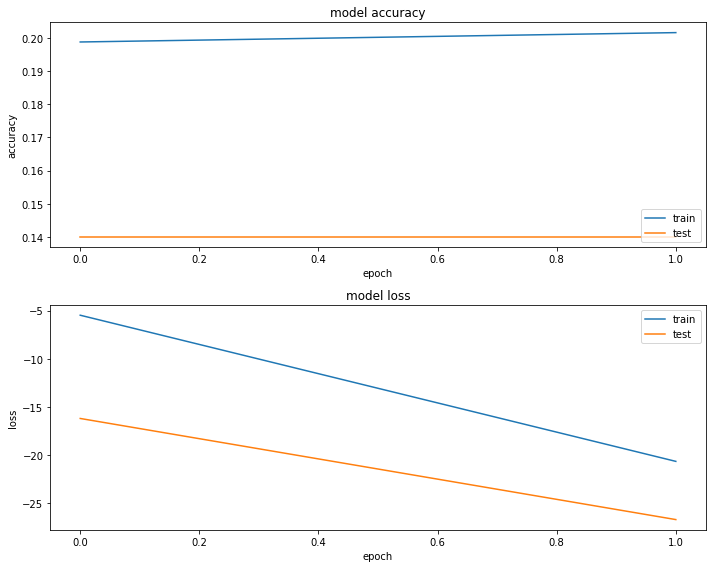

In [74]:
# plotting the metrics
fig = plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

---

## ¡GRACIAS!